# results
---
### purpose 
this notebook is designed to walk the reader through the results of an analysis of the run-time comparison between python and c++. if successful, it will explain what was tested, how the data was collected, and present the results in a clear way. all the code used to collect the data is located in this github repo, so the reader run and/or modify the files in any way.

---
### what was tested
the motivation for this project came when my boss asked me to write a c++ and python version of a Qt gui app and compare runtime of different operations. that led to interest in non-graphical speed tests, so the tests are broken down into graphical and non-graphical. below are the four tests that were run.
>__non-graphical__ 
* random number generation
* prime factorization

>__graphical__
* computation and list population

each test will be explained and the data will be presented in the cells below. enjoy.

---
# random number generation
data collection files: [python](https://github.com/michaelneuder/python_vs_cpp/blob/master/python/non-graphical/data_collector_rng.py) [cpp](https://github.com/michaelneuder/python_vs_cpp/blob/master/cpp/non-graphical/data_collector_rng.cpp)

data files: [python](https://github.com/michaelneuder/python_vs_cpp/blob/master/python/non-graphical/data/rng_data.csv) [cpp](https://github.com/michaelneuder/python_vs_cpp/blob/master/cpp/non-graphical/data/rng_data.csv)

data analysis file: [comparison](https://github.com/michaelneuder/python_vs_cpp/blob/master/analysis/comparing_generation.py)

>__method__: 
a list containing the numbers 1 to 499,501 and incrementing by 500 was created, so there were 1000 values. this list served as the size of the rng lists to be created. both programs took this list and generated a new list of random numbers in the range [2,1000000000) of size of the current index of the original list (so first a list of size 1, then of 501 and so on). the rng was of such a large range because larger numbers take longer to factorize so it lended itself well to the next test.

---

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reading data into dataframes
python_data = pd.io.parsers.read_csv('python/non-graphical/data/rng_data.csv', names=['number of input', 'runtime'], header=0)
cpp_data = pd.io.parsers.read_csv('cpp/non-graphical/data/rng_data.csv', names=['number of input', 'runtime'], header=0)

# quick glance at some of the python data
python_data[:5]

,number of input,runtime
0,1,1.402
1,501,58.855
2,1001,28.796
3,1501,42.008
4,2001,54.964


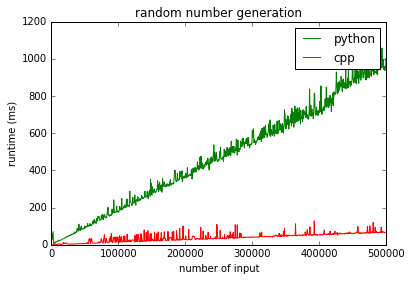

In [83]:
# getting the plot data
python_plot = np.asarray(python_data['runtime'], dtype=np.float64)
cpp_plot = np.asarray(cpp_data['runtime'], dtype=np.float64)

# x-axis plot data
x_plot_python = np.asarray(python_data['number of input'], dtype=np.float64)
x_plot_cpp = np.asarray(cpp_data['number of input'], dtype=np.float64)

# plotting the data
plt.title("random number generation")
plt.xlabel("number of input")
plt.ylabel("runtime (ms)")
plt.plot(x_plot_python, python_plot, 'g', label='python')
plt.plot(x_plot_cpp, cpp_plot, 'r', label='cpp')
plt.legend()
plt.show()

In [84]:
# relationship
quotient = np.asarray([python_plot[i]/cpp_plot[i] for i in range(len(python_plot))])
print(quotient[801:811])
print(quotient[990:])
print("\npython is on average {} times slower than cpp".format(quotient.mean()))

[ 14.57548849  13.14830941  13.58307109  13.36725451  15.67346677
  14.35876505  13.3968577   12.6961164   14.16422916  13.80660648]
[ 14.04895981  14.30564588  13.65910405  13.84655654  14.25400073
  14.46854828  14.46286816  14.31723428  13.90963081  14.71664267]

python is on average 13.12782037890079 times slower than cpp


this turned out to be the noisiest data that was collected. though the data appears to be quite linear, along with the fact that the quotient of the python runtime divided by the cpp runtime seems to be stabalized at around 13-14.

---
# prime factorization
data collection files: [python](https://github.com/michaelneuder/python_vs_cpp/blob/master/python/non-graphical/data_collector_factorization.py) [cpp](https://github.com/michaelneuder/python_vs_cpp/blob/master/cpp/non-graphical/data_collector_factorization.cpp)

data files: [python](https://github.com/michaelneuder/python_vs_cpp/blob/master/python/non-graphical/data/decomp_data.csv) [cpp](https://github.com/michaelneuder/python_vs_cpp/blob/master/cpp/non-graphical/data/decomp_data.csv)

data analysis file: [comparison](https://github.com/michaelneuder/python_vs_cpp/blob/master/analysis/comparing_generation.py)

>__method__: 
the goal of these files is to test how fast each language handled the same algorithm to decompose large numbers into their prime factorization. using the random number generators to create lists of numbers, the prime factorization files take these numbers and decompose them. starting with one input and going up to a thousand, the files only time how long it takes to run the decompose algorithm.

below is the algorithm used to calculate the prime decomposition. i chose to display the python version due to its length and readibility, however the cpp algorithm was implemented in exactly the same way. 
```
def decompose(self, n):
    while(n%2 == 0):
        self.factors.append(2)
        n /= 2

    for i in range(3,int(sqrt(n))+1):
        while(n%i == 0):
            self.factors.append(i)
            n /= i

    if(n > 2):
        self.factors.append(int(n))
       
    return self.factors
    
```

---

In [85]:
# reading data into dataframes
python_data = pd.io.parsers.read_csv('python/non-graphical/data/decomp_data.csv', names=['number of input', 'runtime'], header=0)
cpp_data = pd.io.parsers.read_csv('cpp/non-graphical/data/decomp_data.csv', names=['number of input', 'runtime'], header=0)

# quick glance at some of the python data
python_data[995:]

,number of input,runtime
995,996,2128.797
996,997,2156.966
997,998,2191.000
998,999,2196.961
999,1000,2164.900


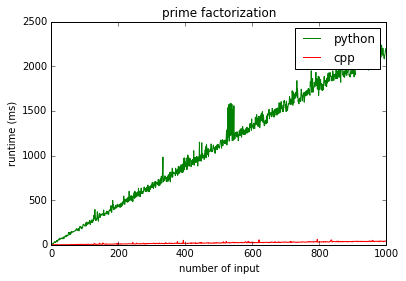

In [86]:
# getting the plot data
python_plot = np.asarray(python_data['runtime'], dtype=np.float64)
cpp_plot = np.asarray(cpp_data['runtime'], dtype=np.float64)

# x-axis plot data
x_plot_python = np.asarray(python_data['number of input'], dtype=np.float64)
x_plot_cpp = np.asarray(cpp_data['number of input'], dtype=np.float64)

# plotting the data
plt.title("prime factorization")
plt.xlabel("number of input")
plt.ylabel("runtime (ms)")
plt.plot(x_plot_python, python_plot, 'g', label='python')
plt.plot(x_plot_cpp, cpp_plot, 'r', label='cpp')
plt.legend()
plt.show()

In [87]:
# relationship
quotient = np.asarray([python_plot[i]/cpp_plot[i] for i in range(len(python_plot))])
print(quotient[100:110])
print(quotient[990:])
print("\npython is on average {} times slower than cpp".format(quotient.mean()))

[ 56.29547219  69.06595928  54.88289474  42.44362416  52.38207985
  60.93986584  49.56646526  36.35307087  55.02151809  30.29347826]
[ 53.68967773  57.51418603  50.53534331  51.6555674   55.24549179
  53.53174743  50.46124693  55.20282187  53.94492462  50.2670196 ]

python is on average 51.80771773317707 times slower than cpp


this turned out pretty nice. again the data is quite linear and the quotient stabalizes quite quickly to around 50.

---

# computation and population (graphical)

now we come to the graphics part of the data collection. as forementioned, this was the original inspiration of the project. we wanted to see how pyqt, the graphics library, performed compared to the same app written in c++ using the regular qt library. data collection was more difficult for this portion of the project, due to the fact that the graphic interface had to be interacted with in order to gather data. to solve this i ended up writing a script in the gui test framework of [eggplant](https://www.testplant.com/eggplant/testing-tools/eggplant-developer/). the language eggplant uses is called [sensetalk](http://docs.testplant.com/?q=content/sensetalk-reference). i didnt include the eggplant suite in the repo because it is quite large and not important to the data, but if you want to see a sample of the eggplant script look [here](https://github.com/michaelneuder/python_vs_cpp/blob/master/cpp/graphical/sense_talk_scripts/run.script). due to the slow nature of running eggplant scripts, less data was collected, but still some reasonable results can be seen. below is an image from the graphical app to paint a picture of what it looked like and the functionality of it. more pictures can be found in the readme. 

![after upload completes](images/after_upload.png)

now on to the results. 

first the non-factorization.

lastly we can look at the results of the computation and list population. lets look at the data.

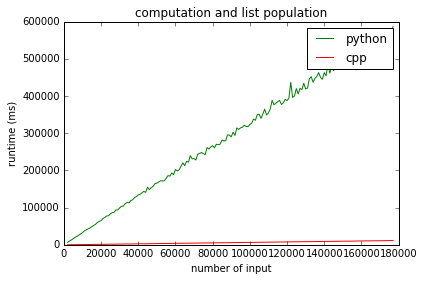

In [88]:
# reading in the data
python_data = pd.io.parsers.read_csv('python/graphical/results_python.csv', names=['number of input','runtime'], header=1)
cpp_data = pd.io.parsers.read_csv('cpp/graphical/results_c++.csv', names=['number of input','runtime'], header=1)

# plotting 
py_time_plot = np.asarray(python_data['runtime'], dtype=np.float64)
cpp_time_plot = np.asarray(cpp_data['runtime'], dtype=np.float64)

num_input_plot = np.asarray(python_data['number of input'], dtype=np.float64)

plt.plot(num_input_plot, py_time_plot, 'g', label='python')
plt.plot(num_input_plot, cpp_time_plot, 'r', label='cpp')
plt.title("computation and list population")
plt.xlabel("number of input")
plt.ylabel("runtime (ms)")
plt.legend()
plt.show()

In [89]:
# checking the quotient
quotient =  np.asarray([py_time_plot[i]/cpp_time_plot[i] for i in range(len(py_time_plot))])
print("pyqt is on average {} times slower than qt for c++.".format(quotient.mean()))

pyqt is on average 51.11668694652376 times slower than qt for c++.
